# Download blood vessel segmentation with cloudvolume

In [3]:
import cloudvolume as cv
import numpy as np

import matplotlib.pyplot as plt

In [6]:
def resize_EM_vessels(vessel_stack, vessel_stack_res, desired_res=(1000, 1000, 1000)):
    """
    Resizes EM vessels 
    
    Args:
        vessel_stack - EM vessel stack segmentation (binarized)
        vessel_stack_res - EM vessel stack resolution in nm/ vx
        desired_res - desired EM vessel stack resolution in nm/ vx
            default is (1000, 1000, 1000)
        
    Returns:
        Resized EM vessel stack (array)
    """
    from scipy import ndimage
    
    # Calculate zoom factors
    zoom_factors = (
        vessel_stack_res[0] / desired_res[0], 
        vessel_stack_res[1] / desired_res[1], 
        vessel_stack_res[2] / desired_res[2]
    )
    # Resize the volume with nearest neighbor interpolation and thezoom factors
    return ndimage.zoom(vessel_stack, zoom_factors, order=0)

## BV segmentation

Generated by Jia Wan and shared with MICrONs by Donglai Wei, related to the following paper: [TriSAM: Tri-plane SAM for zero-shot cortical blood vessel segmentation in VEM images](https://arxiv.org/pdf/2401.13961.pdf)

In [5]:
seg_path = 'precomputed://https://rhoana.rc.fas.harvard.edu/ng/EM_lowres/mouse/bv'
seg_id = 1

# set cv defaults
cv_kwargs= dict()
cv_kwargs.setdefault('use_https', True)
cv_kwargs.setdefault('progress', True)
cv_kwargs.setdefault('fill_missing', True)

# intialize cv
seg_cv = cv.CloudVolume(seg_path, **cv_kwargs) 

# consider your mip level; higher mip is lower resolution and faster download
print('Available mips: ', seg_cv.available_mips)
print( 'mip={} resolution: '.format(3), seg_cv.mip_resolution(3) )

Available mips:  range(0, 4)
mip=3 resolution:  [2048 2048 2560]


In [7]:
# re-intialize cv with specified mip
mip=3
seg_cv = cv.CloudVolume(seg_path, mip=mip, **cv_kwargs) 

# download cloudvolume
em_vessel_stack = seg_cv.download(seg_cv.bounds, mip=mip,  segids=[seg_id]).squeeze()  

# binarize to make tensor
em_vessel_stack[np.where(em_vessel_stack==seg_id)]=1 

em_vessel_stack_res = np.array(seg_cv.resolution)

print('shape:', em_vessel_stack.shape)
print('res (nm/ vx):', em_vessel_stack_res)

Downloading: 100%|███████████████████████████████████████████████████████████████████| 385/385 [01:11<00:00,  5.35it/s]


shape: (643, 447, 312)
res (nm/ vx): [2048 2048 2560]


In [12]:
# Rescale the tensor to be isotropic
em_vessels_resized = resize_EM_vessels(em_vessel_stack, em_vessel_stack_res)
print('shape:', em_vessels_resized.shape)

shape: (1317, 915, 799)


### Visualize (2D)

In [41]:
import matplotlib.pyplot as plt
import numpy as np

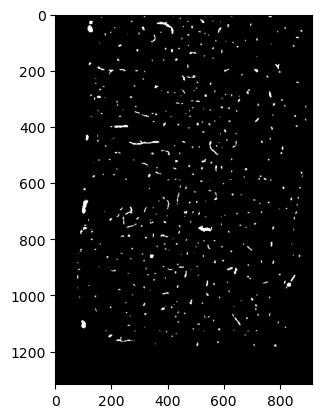

In [9]:
fig, ax = plt.subplots()

# Showing the XY plane at Z=30
ax.imshow(em_vessels_resized[:, :, 30], cmap='binary_r')
ax.set_aspect('equal')